In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/praca-inzynierska'
train_path = 'train path'
test_path = 'test path'

In [ ]:
!unzip speed-limits/train.zip -d speed-limits/

In [ ]:
val_ratio = 0.2
IMG_SIZE = (50, 50)
BATCH_SIZE = 64
train_dir = 'speed-limits/train'

In [ ]:
!pip install -q fastbook

In [ ]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision import *
from fastai.metrics import *

In [ ]:
!ls speed-limits/train

100  120  20  30  40  50  60  70  80


In [ ]:
classes = tuple(os.listdir(train_path))

In [ ]:

data = DataBlock(
    	blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    	get_items=get_image_files,
    	splitter=RandomSplitter(valid_pct=0.1,seed=42),
    	get_y=parent_label,
    	item_tfms=Resize(50),
	)

#
#data = DataBlock(
#  blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
#  get_items=get_image_files,
#  splitter=RandomSplitter(valid_pct=0.2,seed=42),
#  get_y=parent_label,
#  item_tfms=Resize(300)
#)

In [ ]:

data = data.new(
    	item_tfms=RandomResizedCrop(50, min_scale=0.5),
    	batch_tfms=aug_transforms(
      mult = 1,
      do_flip = False,
      flip_vert = False,
      max_rotate = 10,
      min_zoom = 0.0,
      max_zoom = 2.0,
      max_lighting = 0.6,
      max_warp = 0.2,
      p_affine = 0.0,
      p_lighting = 0.0,
      xtra_tfms = None,
      size = None,
      mode = "bilinear",
      pad_mode = "reflection",
      align_corners = True,
      batch = False,
      min_scale = 1,
))
#dodać zoom (?)
#img augumentation computer vision


In [ ]:
dls = data.dataloaders(train_path, bs = 32)

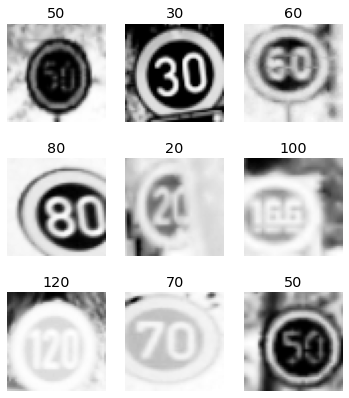

In [ ]:
dls.show_batch(max_n=9, figsize=(6,7))

In [ ]:
learn = cnn_learner(dls, models.resnet34, metrics = accuracy)

In [ ]:
!ls speed-limit-training

learned_pickles  models


In [ ]:
for i in range(15):
	print(f'iteracja : {i}')
	learn.fit_one_cycle(1) #transfer learning
	learn.save(f'{path}/speed-limit-training/models/a3.1.1.{i}')
	learn.export(fname=f'{path}/speed-limit-training/learned_pickles/model{i}.pkl')